# IPL Data Analysis (2008–2020)
This project analyzes 193k+ IPL ball-by-ball records to uncover batting, bowling, and team performance trends.

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('IPL Ball-by-Ball.csv')

# Quick look at data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [39]:
# Descriptive summary of dataset
df.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [40]:
# To check how many records and columns
df.shape

(193468, 18)

In [41]:
# List of all column names
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

# Data Cleaning

In [42]:
# To check if there are any missing values in dataset
df.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

# Removed rows with missing bowling_team values

In [43]:
# Drop rows where bowling_team is missing
df = df.dropna(subset=['bowling_team'])

In [44]:
# Confirm no more nulls in bowling_team
df['bowling_team'].isnull().sum()

0

# Dropped duplicates

In [45]:
df.duplicated().sum()

1

In [46]:
df = df.drop_duplicates()

Verified no missing critical data remains

In [47]:
# Confirm removal
df.duplicated().sum()

0

# Runs Distribution (Batsmen Performance)

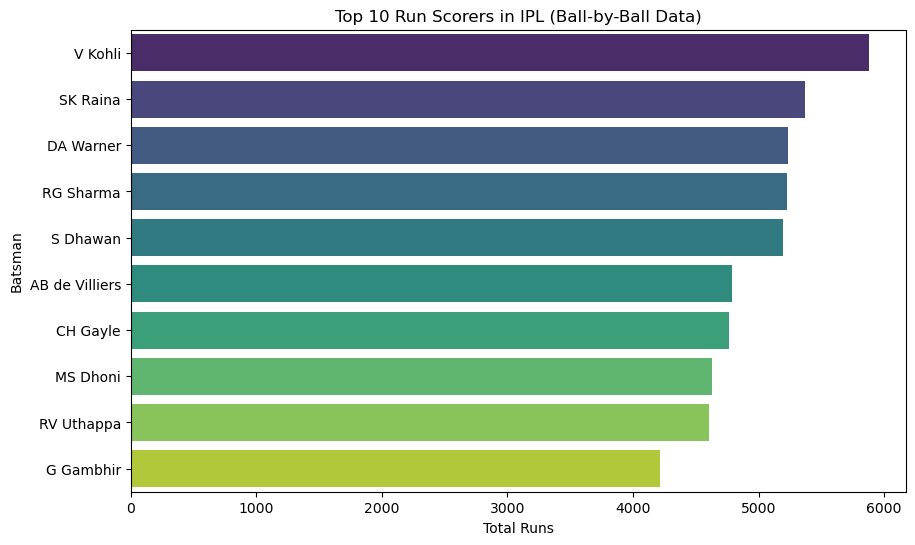

In [48]:
# Calculate total runs scored by each batsman
batsman_runs = (
    df.groupby('batsman')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot the top 10 run scorers (fixed warning)
plt.figure(figsize=(10,6))
sns.barplot(
    x=batsman_runs.values,
    y=batsman_runs.index,
    hue=batsman_runs.index,  # <-- added hue
    dodge=False,
    palette="viridis",
    legend=False  # <-- hides the legend
)
plt.title("Top 10 Run Scorers in IPL (Ball-by-Ball Data)")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()

**Observation:**
Virat Kohli leads as the highest run scorer, showcasing his consistency and ability to anchor RCB’s innings. Suresh Raina (“Mr. IPL”) follows closely, with Warner and Rohit excelling as aggressive top-order players.

Chris Gayle and AB de Villiers feature despite fewer balls faced, reflecting their explosiveness and high strike rates. MS Dhoni and Robin Uthappa highlight their importance as reliable run contributors for their teams.

# Boundary Analysis (4s and 6s)

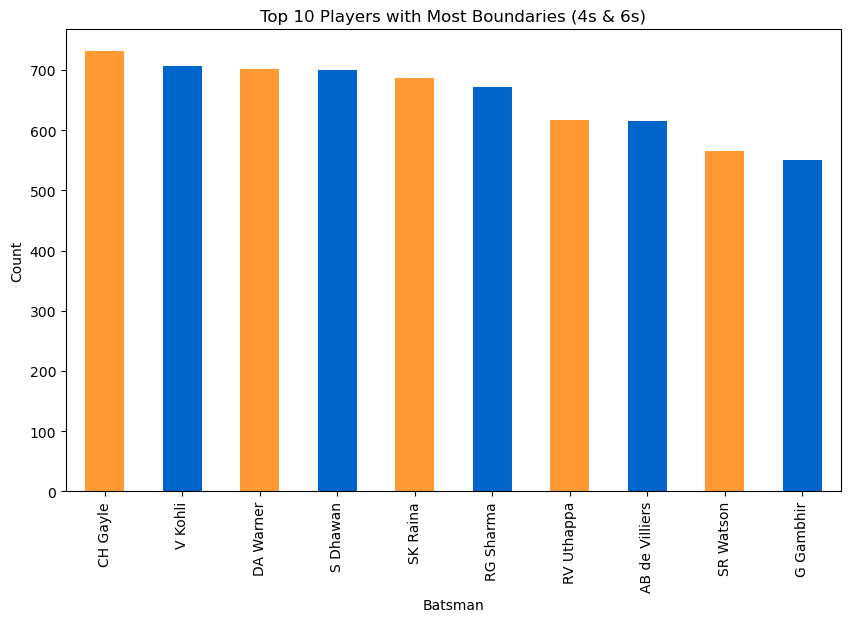

In [49]:
boundaries = df[df['batsman_runs'].isin([4,6])]
boundary_counts = boundaries.groupby(['batsman','batsman_runs']).size().unstack(fill_value=0)
top_boundary = boundary_counts.sum(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_boundary.plot(kind='bar', color=['#ff9933','#0066cc'])
plt.title("Top 10 Players with Most Boundaries (4s & 6s)")
plt.xlabel("Batsman")
plt.ylabel("Count")
plt.show()

Stacked bar of 4s vs 6s

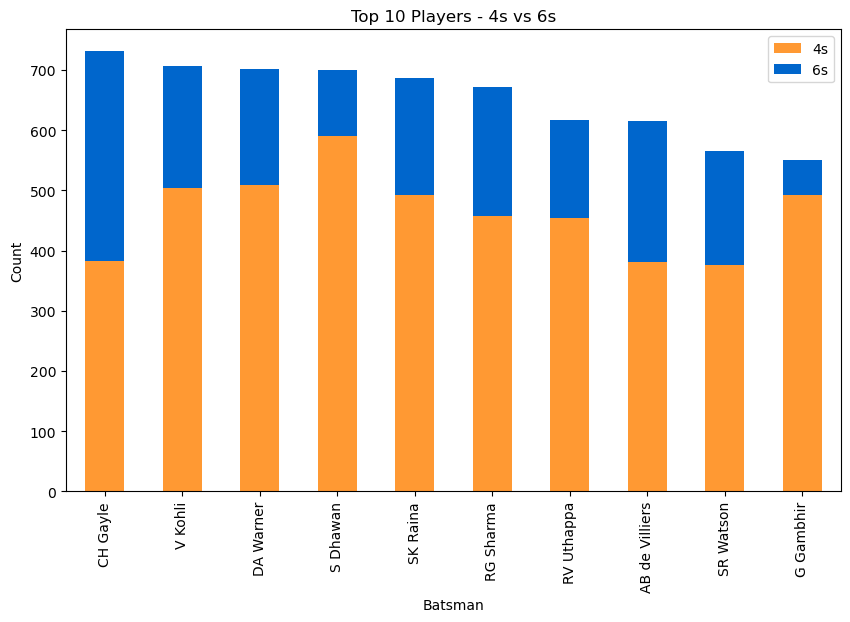

In [50]:
boundaries = df[df['batsman_runs'].isin([4,6])]
boundary_counts = boundaries.groupby(['batsman','batsman_runs']).size().unstack(fill_value=0)
top10_boundary = boundary_counts.sum(axis=1).sort_values(ascending=False).head(10)
top10_players = boundary_counts.loc[top10_boundary.index]

top10_players.plot(kind='bar', stacked=True, figsize=(10,6), color=['#ff9933','#0066cc'])
plt.title("Top 10 Players - 4s vs 6s")
plt.xlabel("Batsman")
plt.ylabel("Count")
plt.legend(["4s", "6s"])
plt.show()

**Observation:**
Chris Gayle leads boundary hitters, showcasing his power-hitting dominance. Kohli, Warner, and Dhawan follow, driven by consistency across seasons. Gayle and AB de Villiers excel at sixes, while Kohli and Dhawan rely more on fours, reflecting contrasting batting styles.

# Bowlers Analysis (Most Wickets)

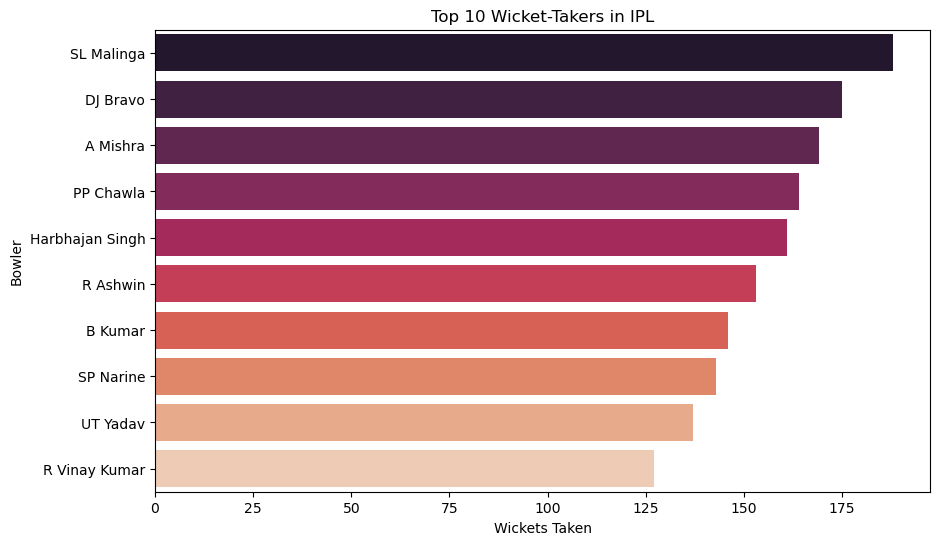

In [51]:
bowler_wickets = (
    df[df['is_wicket']==1]
    .groupby('bowler')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=bowler_wickets.values,
    y=bowler_wickets.index,
    hue=bowler_wickets.index,
    dodge=False,
    palette="rocket",
    legend=False
)
plt.title("Top 10 Wicket-Takers in IPL")
plt.xlabel("Wickets Taken")
plt.ylabel("Bowler")
plt.show()

**Observation:**
SL Malinga tops the IPL wicket charts, followed by Bravo, Mishra, Chawla, and Harbhajan Singh. The presence of both pacers and spinners in the top 10 highlights that success in the IPL requires consistency and adaptability across conditions.

# Team Performance (Runs Scored)

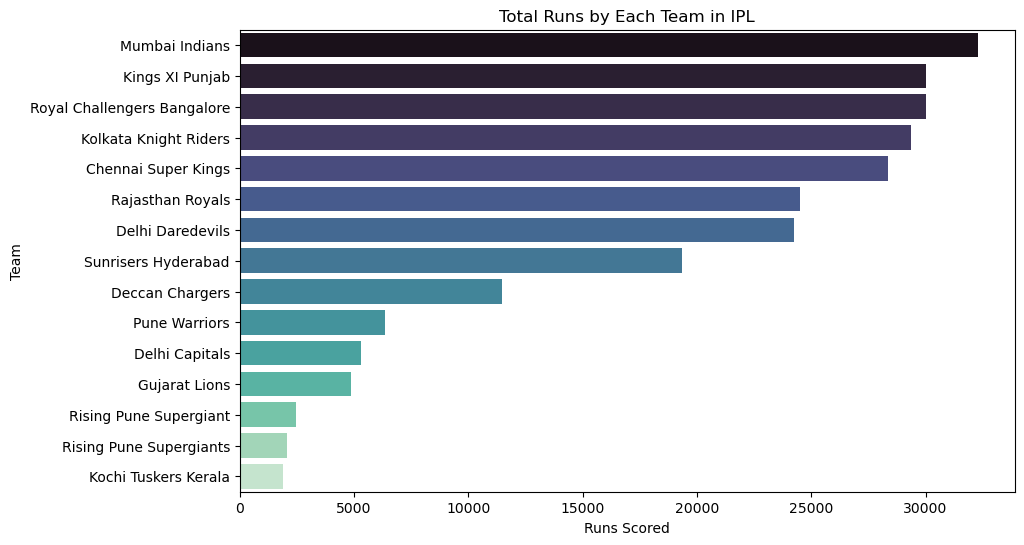

In [52]:
team_runs = (
    df.groupby('batting_team')['total_runs']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=team_runs.values,
    y=team_runs.index,
    hue=team_runs.index,
    dodge=False,
    palette="mako",
    legend=False
)
plt.title("Total Runs by Each Team in IPL")
plt.xlabel("Runs Scored")
plt.ylabel("Team")
plt.show()

**Observation:**
Mumbai Indians lead in total runs, followed closely by RCB, Kings XI Punjab, KKR, and CSK. Mid-table teams like RR and Delhi show moderate totals, while short-lived franchises have naturally lower scores. This reflects both batting strength and the number of seasons played as key contributors to a team’s run tally.

# Dismissal Types

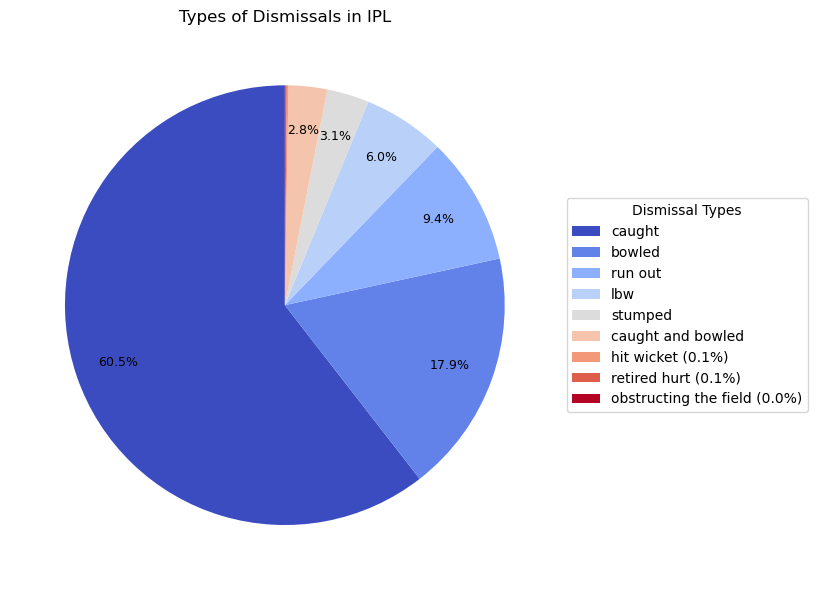

In [53]:
dismissal_kinds = df['dismissal_kind'].value_counts()

# Function to show % only if >= 2.8
autopct = lambda pct: f'{pct:.1f}%' if pct >= 2.8 else ''

plt.figure(figsize=(8,6))
wedges, _, autotexts = plt.pie(
    dismissal_kinds.values,
    autopct=autopct,
    startangle=90,
    colors=plt.cm.coolwarm(np.linspace(0,1,len(dismissal_kinds))),
    pctdistance=0.8
)

# Style percentages
for t in autotexts: t.set_fontsize(9)

# Add legend with small % for slices < 2.8
total = dismissal_kinds.sum()
labels = [f"{l} ({(v/total)*100:.1f}%)" if (v/total)*100 < 2.8 else l 
          for l, v in zip(dismissal_kinds.index, dismissal_kinds.values)]

plt.legend(wedges, labels, title="Dismissal Types", loc="center left", bbox_to_anchor=(1,0,0.5,1))
plt.title("Types of Dismissals in IPL")
plt.tight_layout()
plt.show()


**Observation:**
Most IPL dismissals are caught, followed by bowled and run out, showing that conventional methods dominate wicket-taking. LBW and stumping contribute moderately, while rare dismissals like hit wicket, retired hurt, and obstructing the field make up <1%, indicating their minimal impact on overall results.

# Over-wise Run Rate (Scoring Patterns)

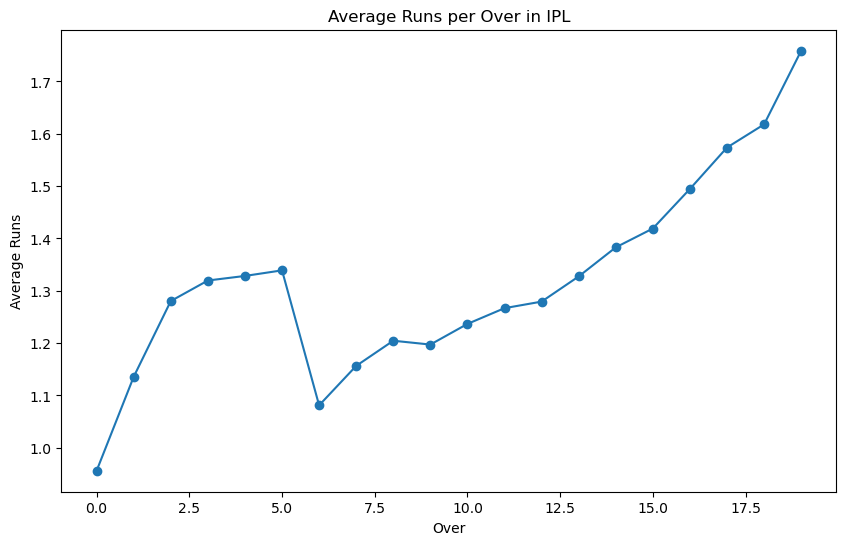

In [54]:
over_runs = df.groupby('over')['total_runs'].mean()

plt.figure(figsize=(10,6))
over_runs.plot(kind='line', marker='o')
plt.title("Average Runs per Over in IPL")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.show()

**Observation:**
Teams follow a 3-phase scoring pattern: a steady start in the powerplay, a slight slowdown in middle overs, and a strong acceleration in the last few overs (especially 19 & 20). This highlights a strategy of risk management early, followed by aggressive batting at the death to maximize runs.

# Over-wise Runs Heatmap 

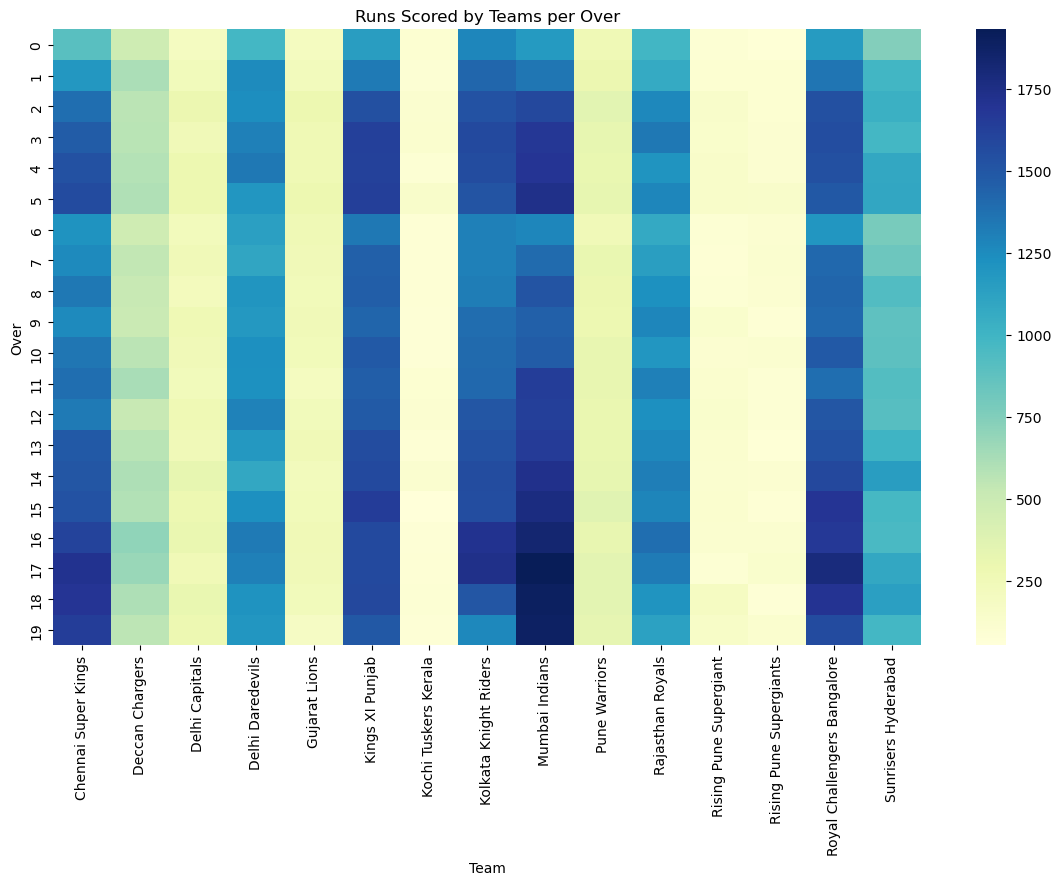

In [55]:
over_runs = df.groupby(['over','batting_team'])['total_runs'].sum().unstack(fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(over_runs, cmap="YlGnBu")
plt.title("Runs Scored by Teams per Over")
plt.xlabel("Team")
plt.ylabel("Over")
plt.show()

**Observation**
Teams show higher scoring rates in the powerplay (overs 1–6) and death overs (16–20), with a slight dip in the middle overs as they consolidate. Mumbai Indians and CSK maintain consistent scoring across all phases, showing strong balance, while other teams rely more heavily on the start and finish for runs.